# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid=ba9612bb34d6042d56eed0c6246a3bad"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mugumu
Processing Record 2 of Set 1 | tenno
Processing Record 3 of Set 1 | betio village
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | south hedland
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | ghat
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | point pedro
Processing Record 14 of Set 1 | motueka
Processing Record 15 of Set 1 | inekar
City not found. Skipping...
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | shippensburg
Processing Record 18 of Set 1 | prakhon chai
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | qaqortoq
Processing Record 2

City not found. Skipping...
Processing Record 37 of Set 4 | mazagao
Processing Record 38 of Set 4 | ola
Processing Record 39 of Set 4 | kalifornsky
Processing Record 40 of Set 4 | el khroub
Processing Record 41 of Set 4 | verkhnevilyuysk
Processing Record 42 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 43 of Set 4 | saipan
Processing Record 44 of Set 4 | borgo
Processing Record 45 of Set 4 | bakanas
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | gorontalo
Processing Record 48 of Set 4 | neryungri
Processing Record 49 of Set 4 | queenstown
Processing Record 0 of Set 5 | mana
Processing Record 1 of Set 5 | muana
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | gualeguay
Processing Record 4 of Set 5 | ijuw
City not found. Skipping...
Processing Record 5 of Set 5 | sarmiento
Processing Record 6 of Set 5 | ulladulla
Processing Record 7 of Set 5 | prince albert
Processing Record 8 of Set 5 | verkhneural'sk
Processing R

Processing Record 30 of Set 8 | ranong
Processing Record 31 of Set 8 | whyalla stuart
City not found. Skipping...
Processing Record 32 of Set 8 | ketchikan
Processing Record 33 of Set 8 | kailua-kona
Processing Record 34 of Set 8 | i-n-salah
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | arroio grande
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | riberalta
Processing Record 39 of Set 8 | taksimo
Processing Record 40 of Set 8 | stettler
Processing Record 41 of Set 8 | sucua
Processing Record 42 of Set 8 | sarmanovo
Processing Record 43 of Set 8 | mirny
Processing Record 44 of Set 8 | gyeongsan-si
Processing Record 45 of Set 8 | kita
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | molepolole
Processing Record 48 of Set 8 | chenzhou
Processing Record 49 of Set 8 | koundara
Processing Record 0 of Set 9 | canete
Processing Record 1 of Set 9 | pante makasar
City not found. Skipping...
Processing Record 2 of Set

Processing Record 19 of Set 12 | lycksele
Processing Record 20 of Set 12 | altay
Processing Record 21 of Set 12 | lengshuijiang
Processing Record 22 of Set 12 | yallahs
Processing Record 23 of Set 12 | dali
Processing Record 24 of Set 12 | casino
Processing Record 25 of Set 12 | verkhniy tagil
Processing Record 26 of Set 12 | kalabo
Processing Record 27 of Set 12 | takamaka
City not found. Skipping...
Processing Record 28 of Set 12 | shangqiu
Processing Record 29 of Set 12 | surgut
Processing Record 30 of Set 12 | leava
Processing Record 31 of Set 12 | undurkhaan
Processing Record 32 of Set 12 | maintirano
Processing Record 33 of Set 12 | buta
Processing Record 34 of Set 12 | urangan
Processing Record 35 of Set 12 | mirganj
Processing Record 36 of Set 12 | sokoni
Processing Record 37 of Set 12 | agat village
Processing Record 38 of Set 12 | taganrog
Processing Record 39 of Set 12 | sanctuary point
Processing Record 40 of Set 12 | salavan
Processing Record 41 of Set 12 | laza
Processing

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.shape[0]
print(f"Record Count: {record_count}")

Record Count: 592


In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mugumu,-1.8500,34.7000,16.51,79,59,2.17,TZ,1698722037
1,tenno,39.9000,139.9667,16.01,63,48,1.43,JP,1698722037
2,betio village,1.3580,172.9211,30.02,73,96,1.45,KI,1698722037
3,luderitz,-26.6481,15.1594,16.28,47,2,2.56,NA,1698721425
4,waitangi,-43.9535,-176.5597,14.34,83,100,5.81,NZ,1698721465


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

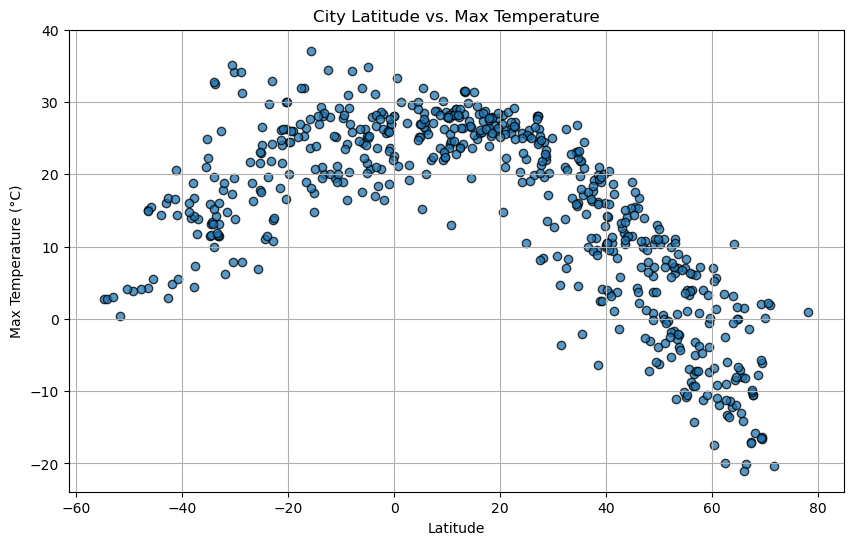

In [17]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

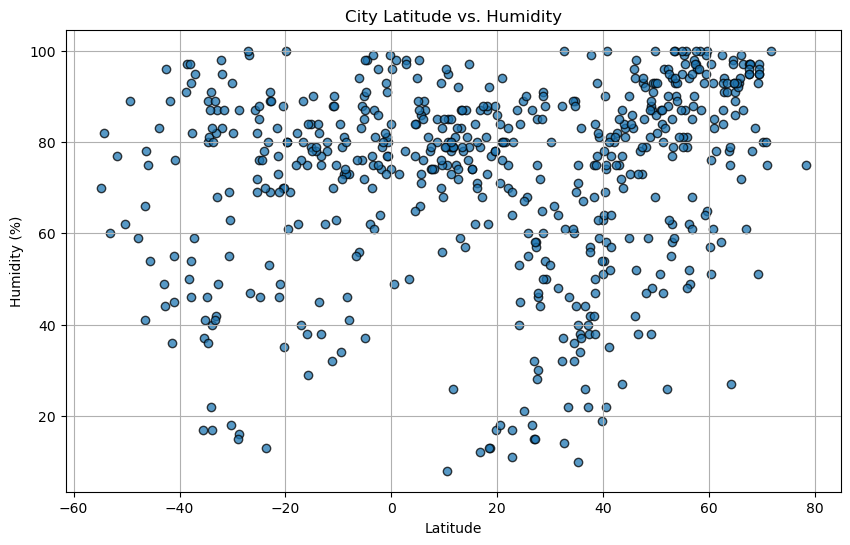

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

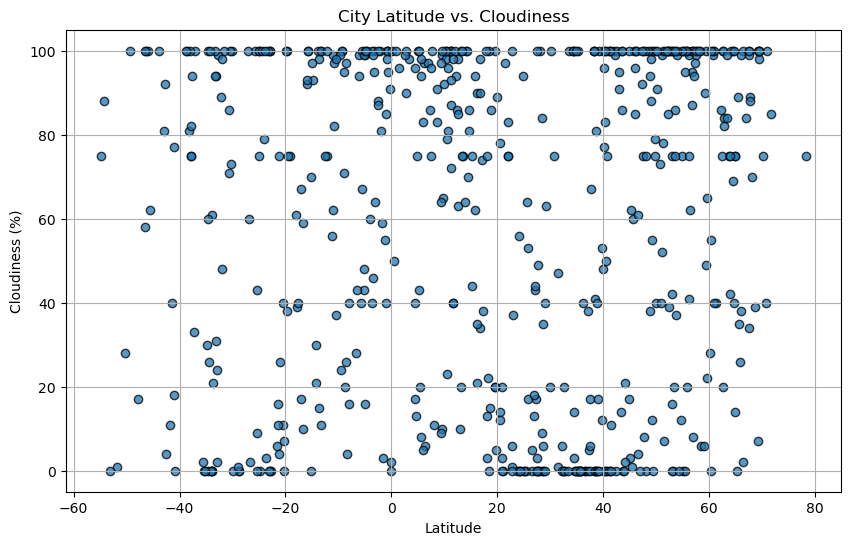

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

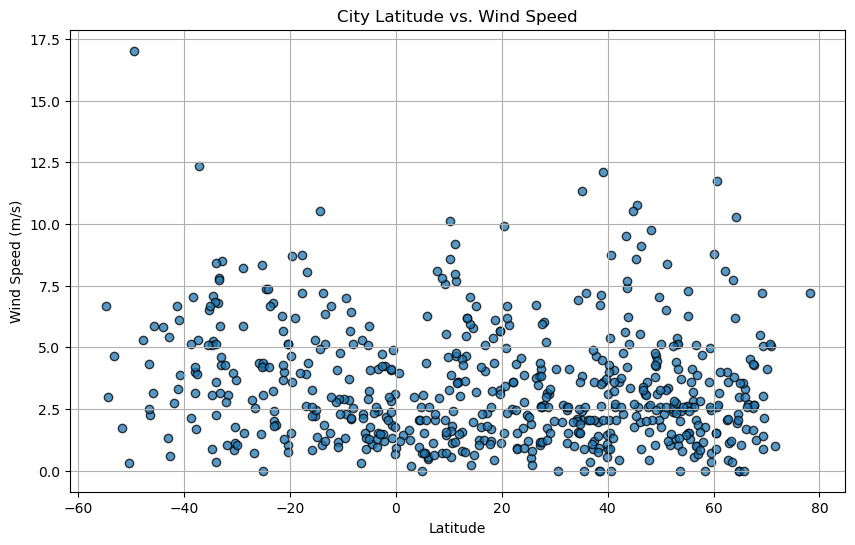

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, label='Data', color='blue')
    plt.plot(x_values, regression_line, label='Regression Line', color='red')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add legend
    plt.legend()

    # Display the regression equation on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='green')

    # Show plot
    plt.show()



In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
print(northern_hemisphere_data.head())


            City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1          tenno  39.9000  139.9667     16.01        63          48   
2  betio village   1.3580  172.9211     30.02        73          96   
6       enewetak  11.3474  162.3373     28.33        80         100   
7           ghat  24.9647   10.1728     22.15        21           0   
8   longyearbyen  78.2186   15.6401      0.91        75          75   

   Wind Speed Country        Date  
1        1.43      JP  1698722037  
2        1.45      KI  1698722037  
6        7.67      MH  1698721487  
7        1.22      LY  1698722038  
8        7.20      SJ  1698721471  


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
print(southern_hemisphere_data.head())

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          mugumu  -1.8500   34.7000     16.51        79          59   
3        luderitz -26.6481   15.1594     16.28        47           2   
4        waitangi -43.9535 -176.5597     14.34        83         100   
5   south hedland -20.4089  118.5983     29.96        70          11   
9  puerto natales -51.7236  -72.4875      0.45        77           1   

   Wind Speed Country        Date  
0        2.17      TZ  1698722037  
3        2.56      NA  1698721425  
4        5.81      NZ  1698721465  
5        5.14      AU  1698722038  
9        1.75      CL  1698721393  


###  Temperature vs. Latitude Linear Regression Plot

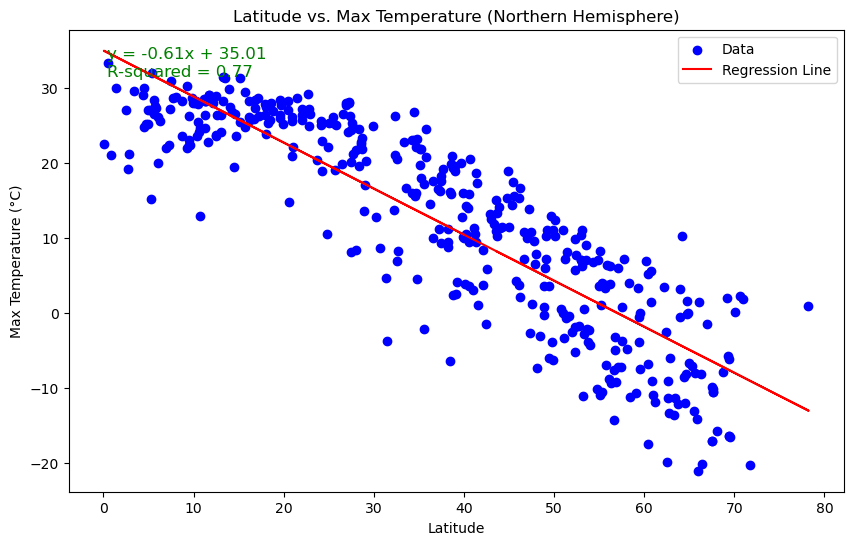

In [32]:
# Linear regression on Northern Hemisphere
def perform_linear_regression(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    return slope, intercept, r_value, p_value, std_err

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = perform_linear_regression(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, label='Data', color='blue')
    plt.plot(x_values, regression_line, label='Regression Line', color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.legend()

    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='green')

    plt.show()
    

max_temp_northern = northern_hemisphere_data["Max Temp"]
latitudes_northern = northern_hemisphere_data["Lat"]

x_label = "Latitude"
y_label = "Max Temperature (°C)"
title = "Latitude vs. Max Temperature (Northern Hemisphere)"


create_linear_regression_plot(latitudes_northern, max_temp_northern, x_label, y_label, title)
   



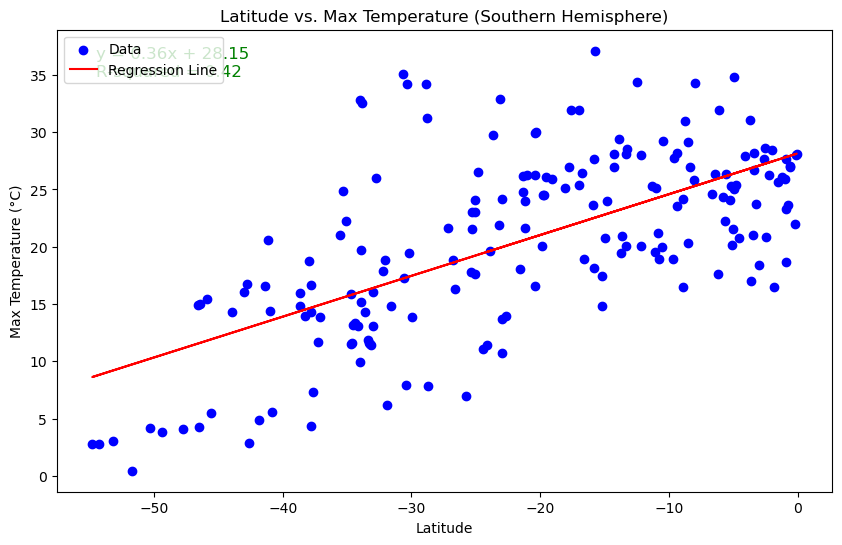

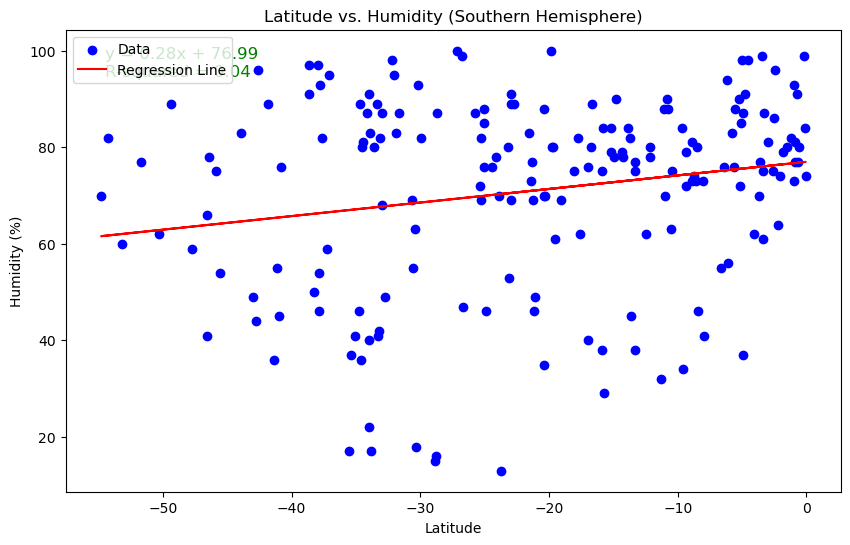

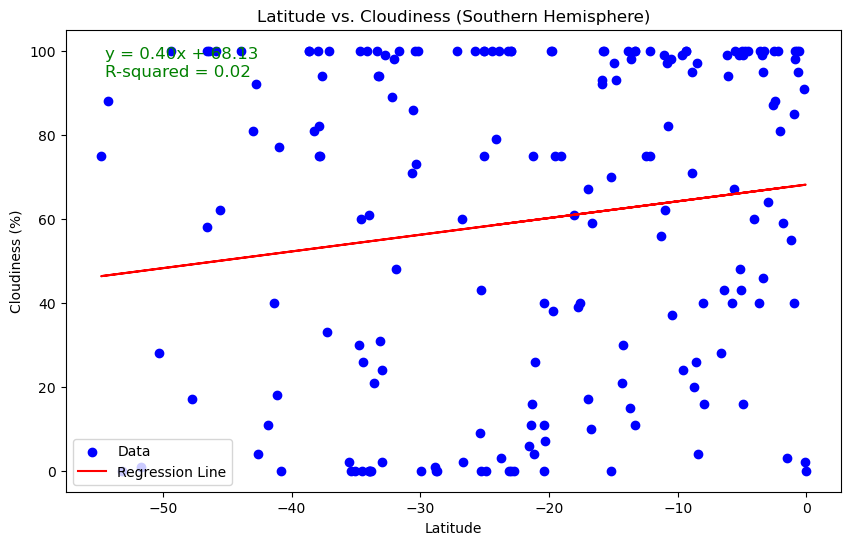

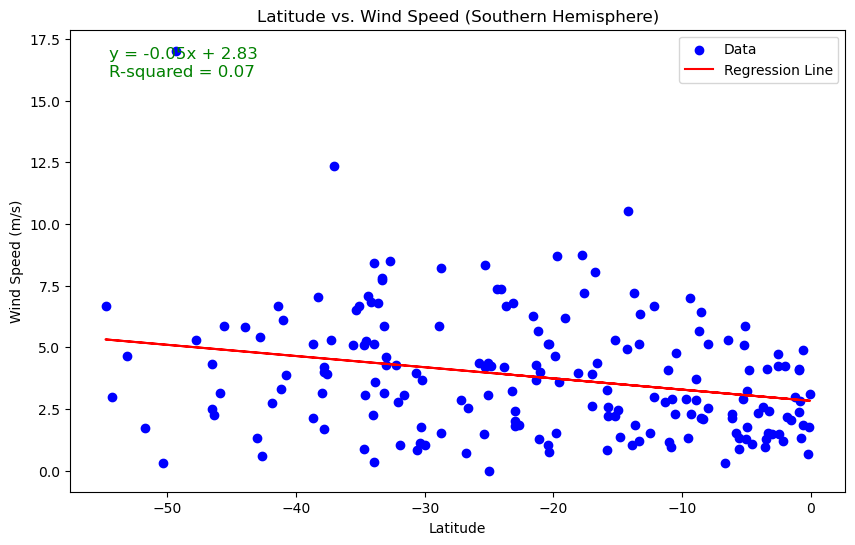

In [33]:
# Linear regression on Southern Hemisphere

max_temp_southern = southern_hemisphere_data["Max Temp"]
latitudes_southern = southern_hemisphere_data["Lat"]


x_label = "Latitude"
y_label_max_temp = "Max Temperature (°C)"
title_max_temp = "Latitude vs. Max Temperature (Southern Hemisphere)"

create_linear_regression_plot(latitudes_southern, max_temp_southern, x_label, y_label_max_temp, title_max_temp)


humidity_southern = southern_hemisphere_data["Humidity"]
y_label_humidity = "Humidity (%)"
title_humidity = "Latitude vs. Humidity (Southern Hemisphere)"
create_linear_regression_plot(latitudes_southern, humidity_southern, x_label, y_label_humidity, title_humidity)


cloudiness_southern = southern_hemisphere_data["Cloudiness"]
y_label_cloudiness = "Cloudiness (%)"
title_cloudiness = "Latitude vs. Cloudiness (Southern Hemisphere)"


create_linear_regression_plot(latitudes_southern, cloudiness_southern, x_label, y_label_cloudiness, title_cloudiness)


wind_speed_southern = southern_hemisphere_data["Wind Speed"]
y_label_wind_speed = "Wind Speed (m/s)"
title_wind_speed = "Latitude vs. Wind Speed (Southern Hemisphere)"


create_linear_regression_plot(latitudes_southern, wind_speed_southern, x_label, y_label_wind_speed, title_wind_speed)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

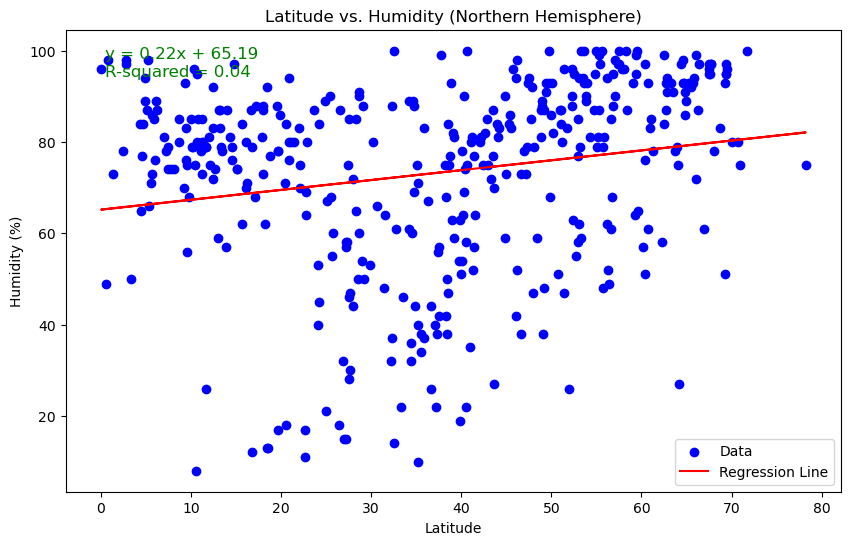

In [34]:
# Northern Hemisphere

humidity_northern = northern_hemisphere_data["Humidity"]
latitudes_northern = northern_hemisphere_data["Lat"]

# Define labels
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Latitude vs. Humidity (Northern Hemisphere)"

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitudes_northern, humidity_northern)
regression_line = slope * latitudes_northern + intercept

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(latitudes_northern, humidity_northern, label='Data', color='blue')
plt.plot(latitudes_northern, regression_line, label='Regression Line', color='red')

# Add labels and title
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

# Add legend
plt.legend()

# Display the regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='green')

# Show plot
plt.show()


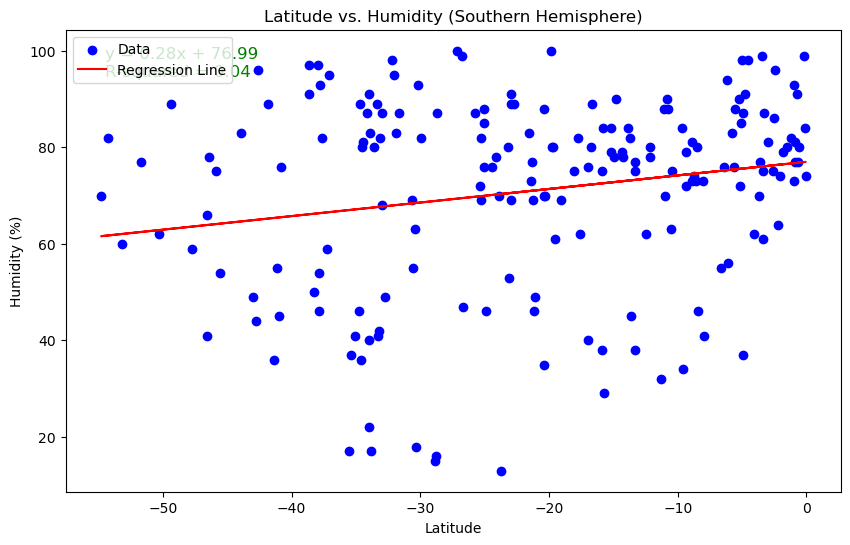

In [35]:
# Southern Hemisphere

humidity_southern = southern_hemisphere_data["Humidity"]
latitudes_southern = southern_hemisphere_data["Lat"]


x_label = "Latitude"
y_label = "Humidity (%)"
title = "Latitude vs. Humidity (Southern Hemisphere)"


slope, intercept, r_value, p_value, std_err = linregress(latitudes_southern, humidity_southern)
regression_line = slope * latitudes_southern + intercept

plt.figure(figsize=(10, 6))
plt.scatter(latitudes_southern, humidity_southern, label='Data', color='blue')
plt.plot(latitudes_southern, regression_line, label='Regression Line', color='red')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.legend()

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='green')

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

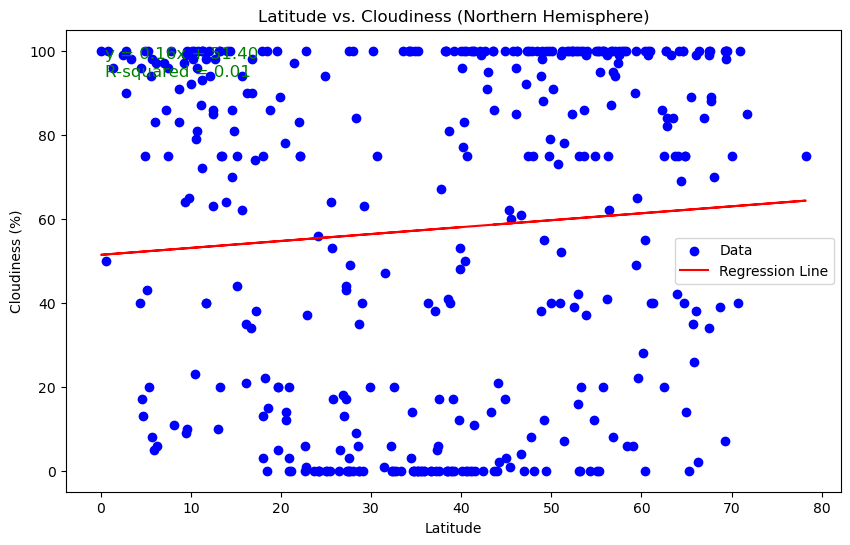

In [36]:
# Northern Hemisphere

cloudiness_northern = northern_hemisphere_data["Cloudiness"]
latitudes_northern = northern_hemisphere_data["Lat"]


x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Latitude vs. Cloudiness (Northern Hemisphere)"

slope, intercept, r_value, p_value, std_err = linregress(latitudes_northern, cloudiness_northern)
regression_line = slope * latitudes_northern + intercept

plt.figure(figsize=(10, 6))
plt.scatter(latitudes_northern, cloudiness_northern, label='Data', color='blue')
plt.plot(latitudes_northern, regression_line, label='Regression Line', color='red')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.legend()

equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='green')

plt.show()


The r-value is: 0.02056735429994368


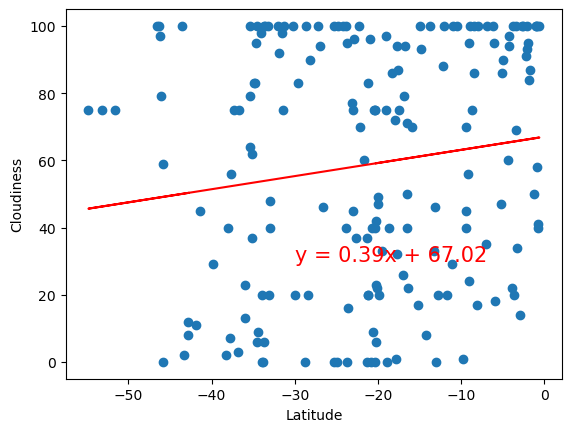

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


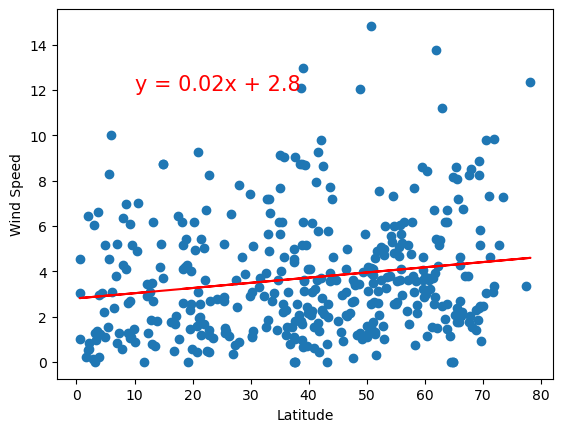

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


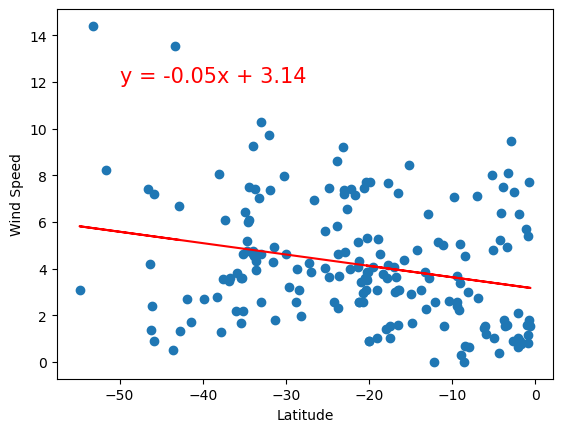

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE